# Infer regulator-regulator network.

In [1]:
# ChromBERT TRN Inference Example
#
# This notebook demonstrates how to infer regulator-regulator network
# using the ChromBERT-tools Python API.

from chrombert_tools import infer_regulator_network

In [4]:
# Set working directory to examples folder
import os
os.chdir("/mnt/Storage2/home/chenqianqian/projects/chrombert_tools/2.test/pull/ChromBERT-tools/examples/api")

Region summary - total: 100, overlapping with ChromBERT: 100 (one region may overlap multiple ChromBERT regions, We keep overlaps with ≥50% coverage of either the ChromBERT bin or the input region),non-overlapping: 0
Note: All regulator names were converted to lowercase for matching.
Regulator count summary - requested: 3, matched in ChromBERT: 3, not found: 0, not found regulator: []
ChromBERT regulators: /mnt/Storage/home/chenqianqian/.cache/chrombert/data/config/hg38_6k_regulators_list.txt
Your supervised_file does not contain the 'label' column. Please verify whether ground truth column ('label') is required. If it is not needed, you may disregard this message.
use organisim hg38; max sequence length is 6391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.02s/it]


Total graph nodes: 951
Total graph edges (threshold=0.636): 11503
Regulator subnetwork saved to: ./output_regulator_network/subnetwork_nanog_k1_q0.980_thr0.636.pdf
Regulator subnetwork saved to: ./output_regulator_network/subnetwork_ctcf_k1_q0.980_thr0.636.pdf
Regulator subnetwork saved to: ./output_regulator_network/subnetwork_ezh2_k1_q0.980_thr0.636.pdf
Finished!
Saved outputs to: ./output_regulator_network
Regulator cosine similarity saved to: ./output_regulator_network/regulator_cosine_similarity.tsv
Total graph edges saved to: ./output_regulator_network/total_graph_edge_threshold0.636_quantile0.980.tsv


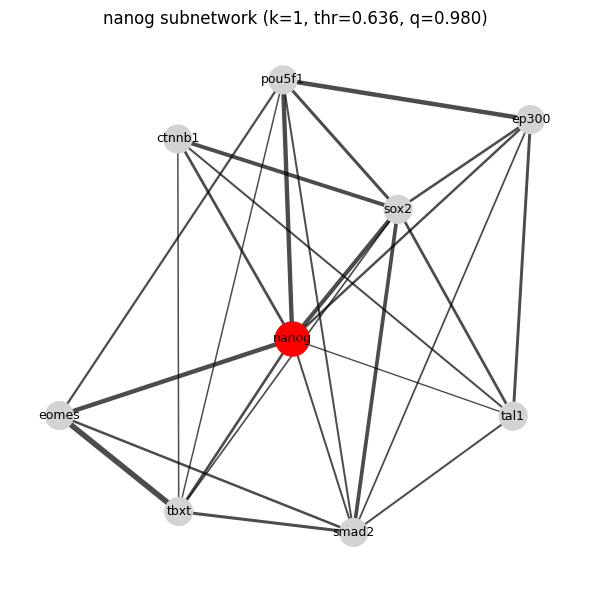

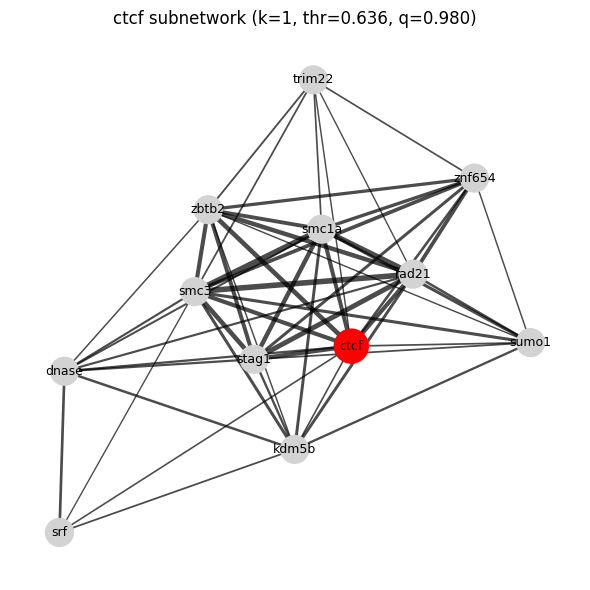

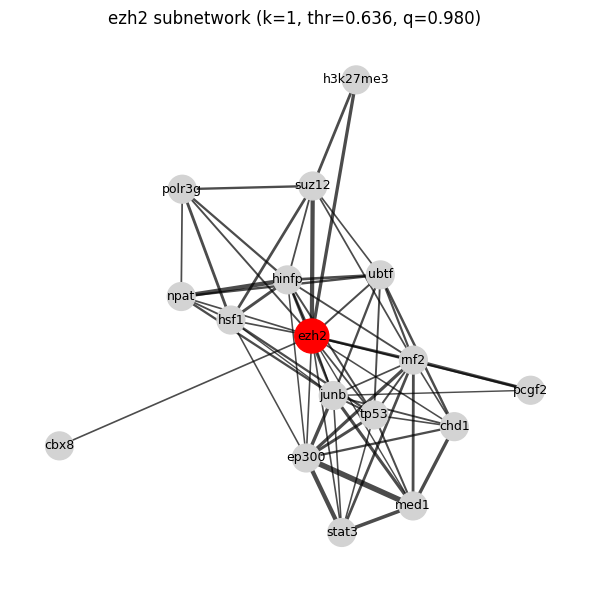

In [5]:
# Infer TRN from genomic regions
# Returns:
#   df_edges: DataFrame with columns [node1, node2, cosine_similarity]
#   Contains edges in the regulatory network where similarity >= threshold
#   Contains subnetwork visualizations for specified regulators

df_edges = infer_regulator_network(
    region="../data/CTCF_ENCFF664UGR_sample100.bed",
    regulator="ctcf;nanog;ezh2",      # Plot subnetworks for these regulators
    odir="./output_regulator_network",
    genome="hg38",                      # Options: "hg38", "mm10"
    resolution="1kb",                   # Options: "1kb", "2kb", "4kb", "200bp"
)

In [6]:
df_edges

,node1,node2,cosine_similarity
0,5hmc,brdu,0.701982
1,5hmc,rloop,0.756476
2,5hmc,sirt1,0.664322
3,5hmc,znf823,0.641759
4,adnp,atf5,0.710570
...,...,...,...
11498,zscan20,zscan23,0.739037
11499,zscan20,zscan5a,0.757539
11500,zscan22,zscan31,0.712420
11501,zscan23,zscan5a,0.870642


In [7]:
df_edges.query("node1 == 'nanog' or node2 == 'nanog'")

,node1,node2,cosine_similarity
1696,ctnnb1,nanog,0.690690
2374,eomes,nanog,0.758861
2415,ep300,nanog,0.678968
5293,nanog,pou5f1,0.755285
5294,nanog,smad2,0.660624
5295,nanog,sox2,0.749701
5296,nanog,tal1,0.636584
5297,nanog,tbxt,0.686592


In [8]:
df_edges.query("node1 == 'ezh2' or node2 == 'ezh2'")

,node1,node2,cosine_similarity
1131,cbx8,ezh2,0.653347
1362,chd1,ezh2,0.647463
2380,ep300,ezh2,0.651421
2715,ezh2,h3k27me3,0.751440
2716,ezh2,hinfp,0.694675
2717,ezh2,hsf1,0.656183
2718,ezh2,junb,0.649472
2719,ezh2,med1,0.638378
2720,ezh2,npat,0.655375
2721,ezh2,pcgf2,0.677134


In [9]:
df_edges.query("node1 == 'ctcf' or node2 == 'ctcf'")

,node1,node2,cosine_similarity
1682,ctcf,dnase,0.704624
1683,ctcf,kdm5b,0.658326
1684,ctcf,rad21,0.851742
1685,ctcf,smc1a,0.844970
1686,ctcf,smc3,0.856302
1687,ctcf,srf,0.656536
1688,ctcf,stag1,0.865400
1689,ctcf,sumo1,0.663740
1690,ctcf,trim22,0.642802
1691,ctcf,zbtb2,0.898986
